# S&P 500日足

In [17]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'GSPC'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

#df = ticker.history(period='1y', start='2024-01-01', end='2024-12-31') # All data in 2024
df = ticker.history(period='1y')  # All data in 2024
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-15 00:00:00-04:00,5123.310059,5136.859863,5104.350098,5117.089844,7753670000,0.0,0.0
2024-03-18 00:00:00-04:00,5154.770020,5175.600098,5145.470215,5149.419922,4036220000,0.0,0.0
2024-03-19 00:00:00-04:00,5139.089844,5180.310059,5131.589844,5178.509766,4031760000,0.0,0.0
2024-03-20 00:00:00-04:00,5181.689941,5226.189941,5171.549805,5224.620117,4064850000,0.0,0.0
2024-03-21 00:00:00-04:00,5253.430176,5261.100098,5240.660156,5241.529785,4207730000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-10 00:00:00-04:00,5705.370117,5705.370117,5564.020020,5614.560059,6409370000,0.0,0.0
2025-03-11 00:00:00-04:00,5603.649902,5636.299805,5528.410156,5572.069824,6221240000,0.0,0.0
2025-03-12 00:00:00-04:00,5624.839844,5642.189941,5546.089844,5599.299805,5219830000,0.0,0.0


In [18]:
df0 = ticker.history(period='2y')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-15 00:00:00-04:00,3876.739990,3894.260010,3838.239990,3891.929932,6594010000,0.0,0.0
2023-03-16 00:00:00-04:00,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,0.0,0.0
2023-03-17 00:00:00-04:00,3958.689941,3958.909912,3901.270020,3916.639893,9354280000,0.0,0.0
2023-03-20 00:00:00-04:00,3917.469971,3956.620117,3916.889893,3951.570068,5347140000,0.0,0.0
2023-03-21 00:00:00-04:00,3975.889893,4009.080078,3971.189941,4002.870117,4920240000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-10 00:00:00-04:00,5705.370117,5705.370117,5564.020020,5614.560059,6409370000,0.0,0.0
2025-03-11 00:00:00-04:00,5603.649902,5636.299805,5528.410156,5572.069824,6221240000,0.0,0.0
2025-03-12 00:00:00-04:00,5624.839844,5642.189941,5546.089844,5599.299805,5219830000,0.0,0.0


## 日足チャートと Bollinger's bands

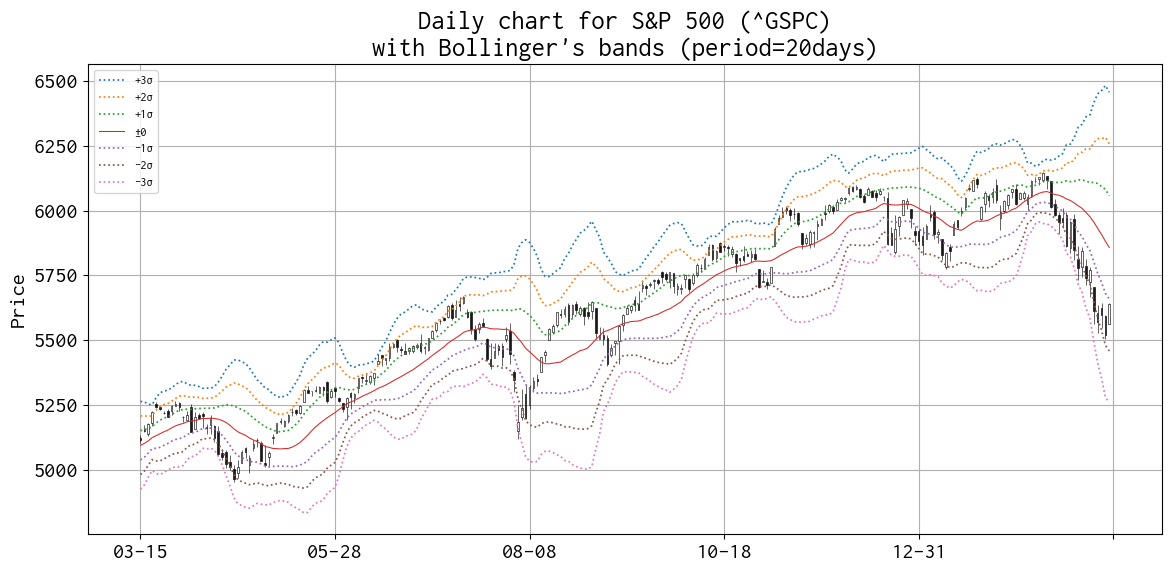

In [19]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

# Bollinger bands
period = 20
r = df0['Close'].rolling(period)    
band_upper3 = r.mean() + 3 * r.std()
band_upper2 = r.mean() + 2 * r.std()
band_upper1 = r.mean() + 1 * r.std()
band_mean = r.mean()
band_lower1 = r.mean() - 1 * r.std()
band_lower2 = r.mean() - 2 * r.std()
band_lower3 = r.mean() - 3 * r.std()

apds  = [
    mpf.make_addplot(band_upper3[df.index], width=1.25, color='C0', linestyle='dotted', label='+3σ', ax=ax),
    mpf.make_addplot(band_upper2[df.index], width=1.25, color='C1', linestyle='dotted', label='+2σ', ax=ax),
    mpf.make_addplot(band_upper1[df.index], width=1.25, color='C2', linestyle='dotted', label='+1σ', ax=ax),
    mpf.make_addplot(band_mean[df.index], width=0.75, color='C3', label='±0', ax=ax),
    mpf.make_addplot(band_lower1[df.index], width=1.25, color='C4', linestyle='dotted', label='-1σ', ax=ax),
    mpf.make_addplot(band_lower2[df.index], width=1.25, color='C5', linestyle='dotted', label='-2σ', ax=ax),
    mpf.make_addplot(band_lower3[df.index], width=1.25, color='C6', linestyle='dotted', label='-3σ', ax=ax),
]   

mpf.plot(
    df,
    type='candle',
    style='default',
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Daily chart for %s (%s)\nwith Bollinger\'s bands (period=20days)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nwith Bollinger\'s bands (period=20days)' % symbol)

plt.tight_layout()
plt.savefig('daily_chart_bollinger_%s.png' % code)
plt.show()

In [20]:
len(df)

250

In [21]:
df.tail(2)['Close']

Date
2025-03-13 00:00:00-04:00    5521.520020
2025-03-14 00:00:00-04:00    5638.939941
Name: Close, dtype: float64

In [22]:
df.tail(2)['Close'].diff()

Date
2025-03-13 00:00:00-04:00           NaN
2025-03-14 00:00:00-04:00    117.419922
Name: Close, dtype: float64

In [23]:
df['Close'].rolling(25).mean().tail()

Date
2025-03-10 00:00:00-04:00    5973.155586
2025-03-11 00:00:00-04:00    5956.255586
2025-03-12 00:00:00-04:00    5938.712383
2025-03-13 00:00:00-04:00    5917.113984
2025-03-14 00:00:00-04:00    5899.328789
Name: Close, dtype: float64

In [24]:
df['Close'].rolling(75).mean().tail()

Date
2025-03-10 00:00:00-04:00    5984.455462
2025-03-11 00:00:00-04:00    5980.168125
2025-03-12 00:00:00-04:00    5975.932389
2025-03-13 00:00:00-04:00    5970.657858
2025-03-14 00:00:00-04:00    5966.527591
Name: Close, dtype: float64

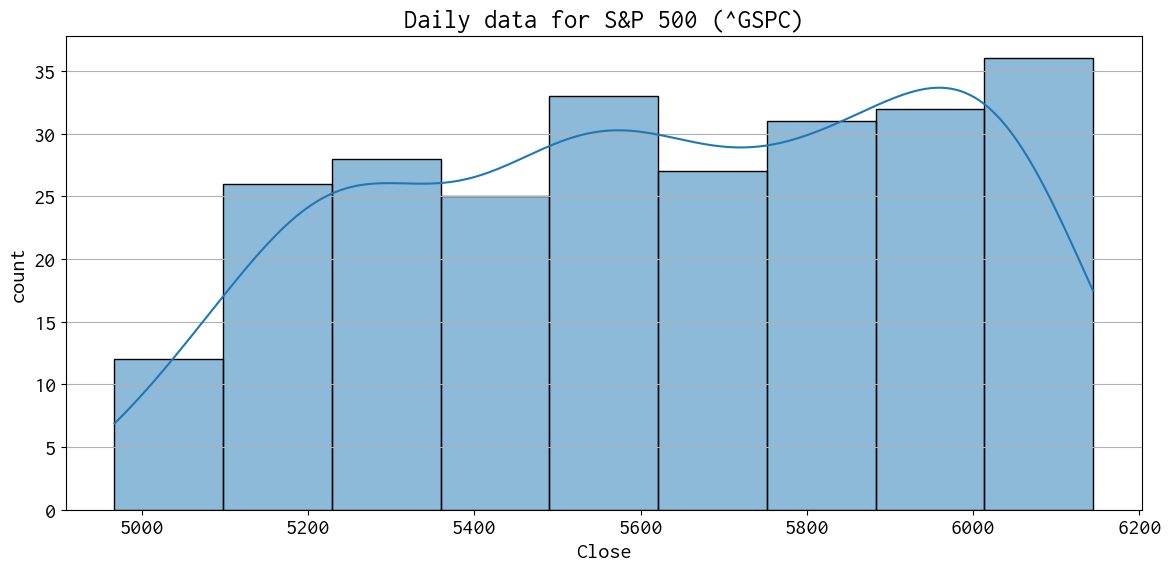

In [25]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Daily data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('daily_histogram_%s.png' % code)
plt.show()

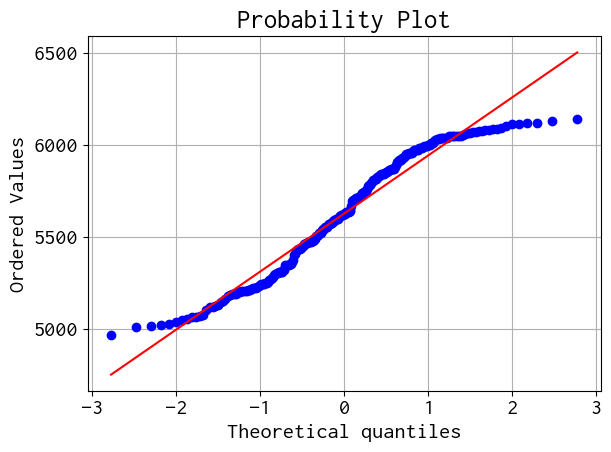

In [10]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()

plt.tight_layout()
plt.savefig('daily_qqplot_%s.png' % code)
plt.show()

In [11]:
len(df)

250

In [12]:
stat, pval = stats.shapiro(df['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.951, p-value: 0.000


In [13]:
res = stats.anderson(df['Close'])

In [14]:
print('%.3f' % res.statistic)

3.325


In [15]:
print(res.critical_values)

[0.567 0.646 0.775 0.904 1.075]


In [16]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]
